<a href="https://colab.research.google.com/github/SammarieoBrown/Natraul-Language-Processing/blob/main/Analyze_Word_Frequency_Counts_Using_Twitter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
df = pd.read_csv("/content/Twitter-Auth (1).csv")

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df = df.rename(columns={"Customer Key\t\t\t": "Customer Key",
                        "Customer Secret Key": "Customer Secret Key",
                        "Access  Token ":"Access Token",
                        "Access Secret Token":"Access Secret Token"})

In [ ]:
df

In [ ]:
consumer_key = df['Customer Key'][0]
consumer_secret = df['Customer Secret Key'][0]
access_token = df['Access Token'][0]
access_token_secret = df['Access Secret Token'][0]



In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [65]:
search_term = "#skillibeng -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

["When you remove the names, you see 3 brothers! 3 kings! 3 is infinite! Hate is a disease! Love is winning! It's a n… https://t.co/gdbu1SgBnd",
 'Me rather chat to me self the last somebody me wah chat to is them!!!\n#Skillibeng #Eastsyde #yuhs #GuideMe',
 '@NICKIMINAJ when I tell you I love crocodile teeth remix with #SkilliBeng 🥰 such a vibe. https://t.co/wP0v6A3GuZ',
 ".@NICKIMINAJ on the Hot 50 this week (excluding the 5 Top 10's):\n\n#11, Chi-Raq (with @gherbo)\n#12, Crocodile Teeth… https://t.co/vfzh1xrWse",
 '@JamaicaObserver Congratulations #Skillibeng']

In [66]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [67]:

all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['When you remove the names you see 3 brothers 3 kings 3 is infinite Hate is a disease Love is winning Its a n',
 'Me rather chat to me self the last somebody me wah chat to is themSkillibeng Eastsyde yuhs GuideMe',
 'NICKIMINAJ when I tell you I love crocodile teeth remix with SkilliBeng such a vibe',
 'NICKIMINAJ on the Hot 50 this week excluding the 5 Top 10s11 ChiRaq with gherbo12 Crocodile Teeth',
 'JamaicaObserver Congratulations Skillibeng']

In [68]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['when',
 'you',
 'remove',
 'the',
 'names',
 'you',
 'see',
 '3',
 'brothers',
 '3',
 'kings',
 '3',
 'is',
 'infinite',
 'hate',
 'is',
 'a',
 'disease',
 'love',
 'is',
 'winning',
 'its',
 'a',
 'n']

In [69]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['when',
  'you',
  'remove',
  'the',
  'names',
  'you',
  'see',
  '3',
  'brothers',
  '3',
  'kings',
  '3',
  'is',
  'infinite',
  'hate',
  'is',
  'a',
  'disease',
  'love',
  'is',
  'winning',
  'its',
  'a',
  'n'],
 ['me',
  'rather',
  'chat',
  'to',
  'me',
  'self',
  'the',
  'last',
  'somebody',
  'me',
  'wah',
  'chat',
  'to',
  'is',
  'themskillibeng',
  'eastsyde',
  'yuhs',
  'guideme']]

In [70]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('skillibeng', 42),
 ('on', 13),
 ('the', 12),
 ('a', 12),
 ('me', 10),
 ('nickiminaj', 9),
 ('by', 9),
 ('is', 8),
 ('to', 7),
 ('remix', 7),
 ('this', 7),
 ('for', 7),
 ('video', 7),
 ('you', 6),
 ('crocodile', 6)]

In [71]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,skillibeng,42
1,on,13
2,the,12
3,a,12
4,me,10


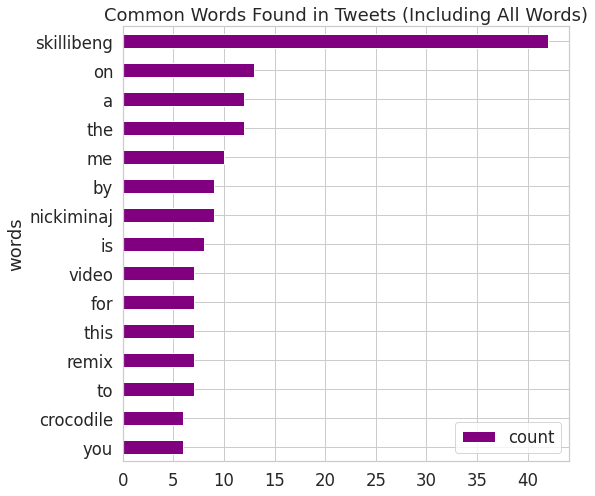

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

Removing Stopwords


In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

["you'd",
 'is',
 "mustn't",
 'between',
 'other',
 'here',
 'don',
 'we',
 "haven't",
 'an']

In [75]:
words_in_tweet[0]

['when',
 'you',
 'remove',
 'the',
 'names',
 'you',
 'see',
 '3',
 'brothers',
 '3',
 'kings',
 '3',
 'is',
 'infinite',
 'hate',
 'is',
 'a',
 'disease',
 'love',
 'is',
 'winning',
 'its',
 'a',
 'n']

In [76]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['remove',
 'names',
 'see',
 '3',
 'brothers',
 '3',
 'kings',
 '3',
 'infinite',
 'hate',
 'disease',
 'love',
 'winning',
 'n']

In [77]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)


[('skillibeng', 42),
 ('nickiminaj', 9),
 ('remix', 7),
 ('video', 7),
 ('crocodile', 6),
 ('x', 6),
 ('guide', 6),
 ('music', 6),
 ('teeth', 5),
 ('bad', 5),
 ('official', 5),
 ('crocodileteethremix', 5),
 ('bitch', 4),
 ('new', 4),
 ('crocodileteeth', 4)]

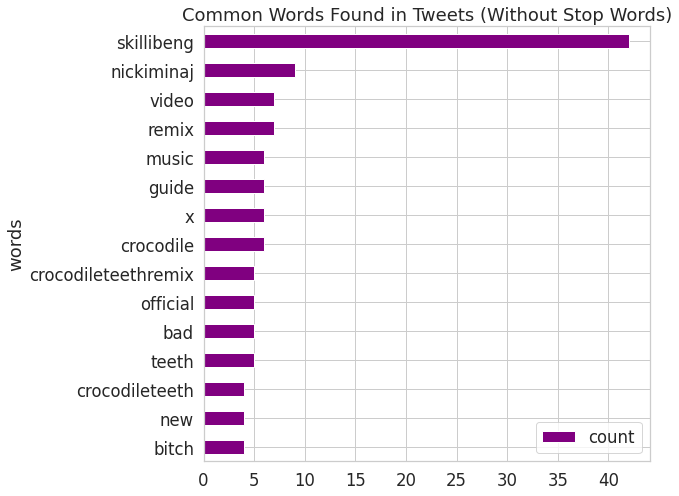

In [78]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

Removing Collection Words